 ## Marcadores Aruco: Geração e Identificação 

Os marcadores aruco são códigos visuais bidimensionais que têm múltiplas funções em aplicações de realidade aumentada e visão computacional. Eles servem para rastrear a posição e orientação de câmeras e objetos, calibrar câmeras, e permitem interações em ambientes de realidade aumentada. 

Para criar um marcador aruco, é necessário usar um software de visão computacional que gera um código visual exclusivo representando um identificador específico. A identificação dos marcadores acontece por meio de algoritmos de processamento de imagem, que analisam os padrões do código para determinar a posição e orientação do marcador no espaço. 

Configurar o ambiente para identificar marcadores aruco envolve dois aspectos essenciais: definir corretamente a posição da câmera e configurar o campo de visão. Primeiro, a posição da câmera deve ser determinada com precisão, incluindo sua localização tridimensional e orientação no espaço. Em seguida, o campo de visão da câmera deve ser ajustado para capturar a área desejada. Isso garante que os marcadores estejam dentro da área capturada. 

Para identificar marcadores em movimento, a câmera precisa capturar imagens em tempo real, geralmente com câmeras de alta taxa de quadros. O software de processamento de imagem é, então, utilizado para rastrear os marcadores em constante movimento, calculando sua posição e orientação à medida que se deslocam. 

## Pré-Processamento de Imagem

Técnicas de pré-processamento de imagens são utilizadas para melhorar a qualidade das imagens capturadas antes do processamento realizado pela visão computacional. Isso inclui, mas não se limita a, técninas de remoção de ruídos, correção de distorções e melhoria de cores e contraste. 

No caso do projeto, a qualidade da câmera utilizida dispensa a necessidade de correções de distorção para a detecção dos marcadores. Porém uma correção nas cores e contraste e remoção dos ruídos pode auxiliar em situações sub-optimas de iluminação.

## Exemplo

Vamos considerar a imagem abaixo de um exemplo de labirinto:

<img src="assets/lab.jpg" alt="Labirinto" width="200"/>

Apesar da imagem apresentar as condições ideais para a detecção dos marcadores, ela será utilizada para exemplificar o processo.

1. Primeiramente vamos carregar a imagem e convertê-la para escala de cinza:

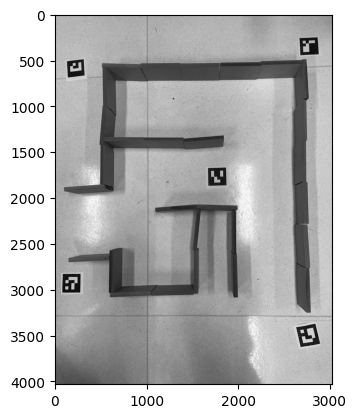

In [36]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('assets/lab.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')

2. Em seguida vamos aumentar o contraste da imagem para facilitar a detecção dos marcadores:

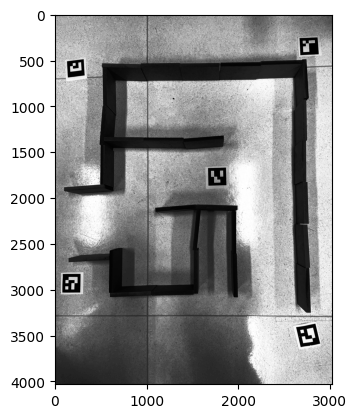

In [37]:
contrast = cv2.equalizeHist(gray)

plt.imshow(contrast, cmap='gray')


3. Por fim, vamos aplicar um threshold para binarizar a imagem e aplicar erosoes e dilatações para remover ruídos:

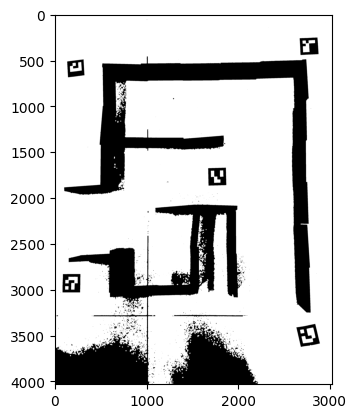

In [38]:
thresh = cv2.threshold(contrast, 60, 255, cv2.THRESH_BINARY)[1]

thresh = cv2.erode(thresh, None, iterations=2)

thresh = cv2.dilate(thresh, None, iterations=4)

plt.imshow(thresh, cmap='gray')

Agora podemos utilizar a imagem binarizada para identificar os marcadores aruco e desenhar os contornos dos marcadores identificados em cima da imagem original:

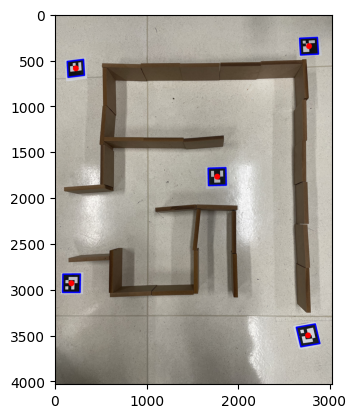

In [39]:
import cv2.aruco as aruco

aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_4X4_100)
parameters = aruco.DetectorParameters()

corners, ids, rejectedImgPoints = aruco.detectMarkers(thresh, aruco_dict, parameters=parameters)
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

ids = ids.flatten()
for (markerCorner, markerID) in zip(corners, ids):
    corners = markerCorner.reshape((4, 2))
    (topLeft, topRight, bottomRight, bottomLeft) = corners

    topRight = (int(topRight[0]), int(topRight[1]))
    bottomRight = (int(bottomRight[0]), int(bottomRight[1]))
    bottomLeft = (int(bottomLeft[0]), int(bottomLeft[1]))
    topLeft = (int(topLeft[0]), int(topLeft[1]))

    cX = int((topLeft[0] + bottomRight[0]) / 2.0)
    cY = int((topLeft[1] + bottomRight[1]) / 2.0)

    cv2.line(img, topLeft, topRight, (0, 0, 255), 16)
    cv2.line(img, topRight, bottomRight, (0, 0, 255), 16)
    cv2.line(img, bottomRight, bottomLeft, (0, 0, 255), 16)
    cv2.line(img, bottomLeft, topLeft, (0, 0, 255), 16)
    
    cv2.circle(img, (cX, cY), 32, (255, 0, 0), -1)
                
plt.imshow(img)

## Tracking do Robô

O código em anexo realiza o tracking do robô marcadores aruco. Exemplo de resultado

<img src="assets/empty.png" alt="Labirinto" width="300"/>

</br>
<img src="assets/tracking.png" alt="Labirinto" width="300"/>




---
Felipe Garcia \
Pedro Soares \
Osvaldo Geremias \
Sergio Murilo